# Taller 2 - Aprendizaje Supervisado

La segunda clase del curso fue una introducción al que puede ser el tipo mas popular de Aprendizaje Automatico, el Aprendizaje Supervisado. Los modelos de este tipo son utilizados para variadas tareas en diversas áreas.

En este taller vamos a explorar dos algoritmos simples, como lo son la regresión lineal y los arboles de decision. Aunque simples, estos  modelos pueden dar muy buenos resultados, e introducen conceptos importantes del Aprendizaje Automático que veremos a lo largo del curso.

En este cuaderno conoceremos estos modelos a traves de dos bases de datos nuevas, y muy populares como lo son el Boston Housing dataset y el Penguins dataset. Exploraremos variaciones sobre los algoritmos y herramientas para interpretar los resultados.


**Nota ética:** Desde que se escribió este cuaderno de taller, el Boston Housing dataset fue eliminado de sklearn, por [preocupaciones éticas](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) relacionadas a racismo implícito en los datos recolectados. El dataset se mantiene en este cuaderno porque varios de los problemas concebidos originalmente para el taller no funcionan bien con otros datasets.

## Ejercicio 1 - Regresión Lineal

Como vimos en el curso, la regresion lineal es una tecnica de **modelado predictivo** que encuentra relaciones entre variables independientes $x_i$, que pueden ser *categoricas* (e.g. valores como "Bueno", "Intermedio", "Malo") o *continuas* (valores como 24.0, 3.14, etc), y predice una **respuesta $y$ continua**.

Las tecnicas de regresion son ampliamente usadas para prediccion y modelado de series temporales, y un ejemplo es la prediccion de precios a partir de variables del mercado.

### 1.1 - Boston Housing

Este dataset incluye 13 caracteristicas (como habitaciones por hogar, ratio alumno/docente en las escuelas,y robos per capita, entr otros), para más de 500 barrios y suburbios de la ciudad de Boston, Massachusetts, EEUU.

In [1]:
# Como siempre, comenzamos importando los paquetes necesarios

import numpy as np # paquete con funcionalidades matemáticas
import pandas as pandas # paquete que permite manipular datos con formato de tabla
from pandas import plotting as pandas_plot # funciones para graficar datos de tablas
import matplotlib.pyplot as plt # funciones generales para graficar
from sklearn.model_selection import train_test_split # separación de datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression, Ridge, Lasso # modelos para calcular regresión lineal
from sklearn.metrics import mean_squared_error, r2_score # funciones para medir rendimiento de la regresión
import seaborn as sns

In [2]:
# y cargando el set de datos
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pandas.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
caracteristicas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

n,m = X.shape
# Imprimimos informacion sobre el dataset
print(f"datos: {n} muestras de dimensión {m} cada una.")
print(caracteristicas)

datos: 506 muestras de dimensión 13 cada una.
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [3]:
from sklearn.preprocessing import StandardScaler
# Separamos el dataset en un conjunto de entrenamiento y otro de testeo
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
#
# Como se vió en el cuaderno anterior, estandarizamos los datos
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Como en el cuaderno anterior, comenzamos visualizando los datos a mano.

Una forma de visualizar un set de datos con muchas variables es usando una *matriz de correlación*, donde cada cuadrado muestra la correlación entre dos variables. En la celda de abajo, graficamos la matriz de correlación entre cada par de variables, incluida nuestra variable objetivo (MEDV, el precio mediano de las viviendas de un distrito).

<Axes: >

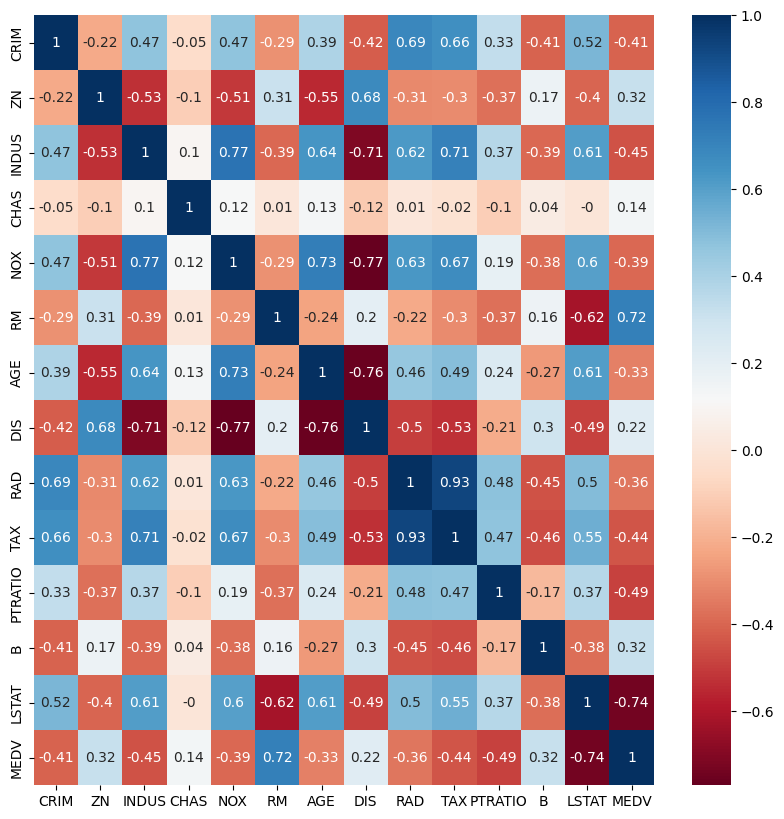

In [4]:
# llevamos el dataset a un dataframe de pandas
boston = pandas.DataFrame(Xtrain, columns=caracteristicas)
# agregamos el valor medio de las casas (MEDV) que es nuestro target
boston['MEDV'] = ytrain

# calculamos la matriz de correlacion con .corr()
# .round(2) redondea a dos cifras significativas
matriz_correlacion = boston.corr().round(2)
# annot = True imprime los valores adentro de las celdas
plt.figure(figsize=(10,10))
sns.heatmap(data=matriz_correlacion, annot=True, cmap="RdBu")

**Pregunta 1.1:** Analizando la matriz de correlación, ¿qué características piensa pueden ser útiles para predecir MEDV? ¿Porqué? ¿Para predecir algo, da lo mismo una característica con correlación muy positiva que una con correlación muy negativa?

*Inserte su respuesta aquí:*

**Extra 1.1** Experimenten con otras formas de visualizar el dataset, pueden ser histogramas, observar una parte de los datos con la funcion .head() de _pandas_, o cualquier otra que se les ocurra.

*Puede insertar su respuesta aquí:*

Y de yapa, una propuesta de visualizacion de los datos:

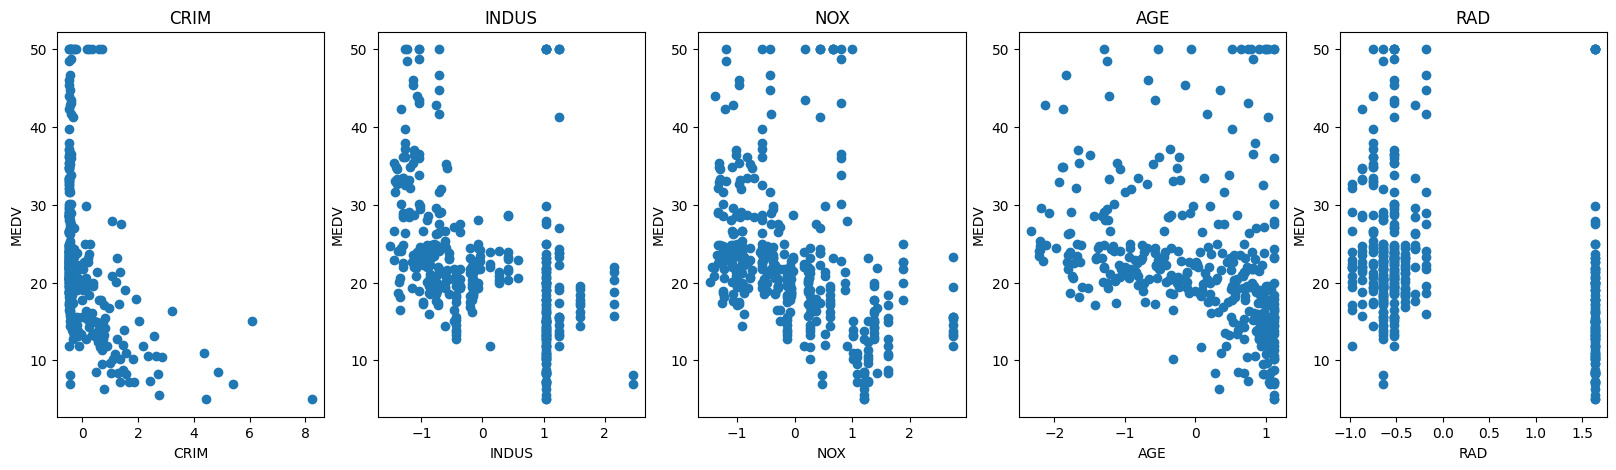

In [5]:
# Seleccione las variables que quiera usar para ajustar el modelo
# Recuerde que las variables posibles son:
# 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B' y 'LSTAT'
#
variablesUsadas = ['INDUS', 'AGE', 'CRIM', 'NOX', 'RAD'] # MODIFICABLE

# Extraemos los índices de las columnas que corresponden a esos nombres, usando list comprehensions
indicesUsados = [i for i, val in enumerate(caracteristicas) if val in variablesUsadas]

# Con los índices, armamos Xtrain y Xtest incompletos, con sólo las columnas especificadas
Xtrain_inc = Xtrain[:,indicesUsados]
Xtest_inc = Xtest[:,indicesUsados]
#
# Y graficamos un scatter plot de las variables a utilizar
plt.figure(figsize=(20, 5))
for i, col in enumerate(indicesUsados):
    plt.subplot(1, len(indicesUsados) , i+1)
    x = Xtrain[:,col]
    y = ytrain
    plt.scatter(x, y, marker='o')
    plt.title(caracteristicas[col])
    plt.xlabel(caracteristicas[col])
    plt.ylabel('MEDV')

Luego de haber observado un poco los datos con los que vamos a trabajar, procedemos a entrenar un modelo de la misma manera que en el notebook de práctico.

In [6]:
# Ajustamos una regresión a todas las columnas
#
# Primero definimos nuestro modelo
lr = LinearRegression()

# Luego lo ajustamos a los datos
lr.fit(Xtrain, ytrain)

# Obtenemos las métricas de evaluación para el set de entrenamiento y de testeo y las imprimimos:

# evaluacion modelo sobre los datos de entrenamiento
ytrain_predict = lr.predict(Xtrain)
r2_train = r2_score(ytrain, ytrain_predict)

# evaluacion del modelo sobre los datos de testeo
ytest_predict = lr.predict(Xtest) # RELLENE LO QUE FALTA
r2_test = r2_score(ytest, ytest_predict) # RELLENE LO QUE FALTA
#
print( f"Usando todas las columnas, R2 en training set es {r2_train:5.3f}, y en el test set es de {r2_test:6.3f}" )

Usando todas las columnas, R2 en training set es 0.741, y en el test set es de  0.711


A veces, los modelos con muchas variables pueden generar overfitting (un sobreajuste a los datos de entrenamiento, que se manifiesta como una diferencia entre los datos de entrenamiento y de testeo). Una forma de reducir el overfitting en la regresión es el uso de regularización. Dos ejemplos de regresión con regularización son Ridge y Lasso.

**Ayuda:** Puede leer más sobre Ridge y Lasso en la [página de modelos lineales](https://scikit-learn.org/stable/modules/linear_model.html) de sklearn, secciones 1.1.2.1 y 1.1.3.

**Pregunta 1.2:** Hagamos una regresión de Ridge, y otra regresión de Lasso con los mismos datos, **rellenando el código incompleto de abajo**. Recomendamos un valor de `alpha=0.5` para Ridge, y `alpha=0.1` para Lasso (alpha es un hiperparámetro, como lo era `n_neighbor` en el cuaderno anterior)

In [7]:
# Primero defina el modelo de Ridge. Busque como hacerlo en el cuaderno del práctico 2-1,
# al final donde se muestra la regularización. Note que debe elegir el valor
# del parámetro de regularización.
#
modeloRidge = Ridge(alpha=0.5) ### LLENAR: Defina el modelo Ridge
#
# Luego ajuste el modelo definido a los datos de todas las columnas
modeloRidge.fit(Xtrain, ytrain) ### LLENAR: llene el paréntesis con lo necesario para entrenar el modelo
#
# Ahora haga lo mismo pero para un modelo tipo Lasso
### LLENAR: Defina el modelo Lasso
modeloLasso = Lasso(alpha=0.1)
#
modeloLasso.fit(Xtrain, ytrain) ### LLENAR: llene el paréntesis con lo necesario para entrenar el modelo


Lasso(alpha=0.1)

In [8]:
#### Uncomment for students
#
# Luego evaluamos el rendimiento de los modelos
#
# Evaluación Ridge:
#ytrain_predict_ridge = ### LLENAR: Llene para obtener las predicciones del modelo ridge para el set de ENTRENAMIENTO
#r2_train_ridge = r2_score(ytrain, ytrain_predict_ridge)
# evaluacion del modelo sobre los datos de testeo
#ytest_predict_ridge = ### LLENAR: Llene para obtener las predicciones del modelo ridge para el set de TESTEO
#r2_test_ridge = r2_score(ytest, ytest_predict_ridge)
#
# Evaluación LASSO
#ytrain_predict_lasso = ### LLENAR: Llene para obtener las predicciones del modelo lasso para el set de ENTRENAMIENTO
#r2_train_lasso = r2_score(ytrain, ytrain_predict_lasso)
# evaluacion del modelo sobre los datos de testeo
#ytest_predict_lasso = ### LLENAR: Llene para obtener las predicciones del modelo lasso para el set de TESTEO
#r2_test_lasso = r2_score(ytest, ytest_predict_lasso)

# Finalmente, imprimimos el rendimiento de los modelos
#
#print( f"El R2 del modelo Ridge en training set es de {r2_train_ridge:5.3f}, y en el test set es de {r2_test_ridge:6.3f}" )
#print( f"El R2 del modelo LASSO en training set es de {r2_train_lasso:5.3f}, y en el test set es de {r2_test_lasso:6.3f}")

In [9]:
###### Remove cell for students
# Luego evaluamos el rendimiento de los modelos
#
# Evaluación Ridge:
ytrain_predict_ridge = modeloRidge.predict(Xtrain)
r2_train_ridge = r2_score(ytrain, ytrain_predict_ridge)
# evaluacion del modelo sobre los datos de testeo
ytest_predict_ridge = modeloRidge.predict(Xtest)
r2_test_ridge = r2_score(ytest, ytest_predict_ridge)
#
# Evaluación LASSO
ytrain_predict_lasso = modeloLasso.predict(Xtrain)
r2_train_lasso = r2_score(ytrain, ytrain_predict_lasso)
# evaluacion del modelo sobre los datos de testeo
ytest_predict_lasso = modeloLasso.predict(Xtest)
r2_test_lasso = r2_score(ytest, ytest_predict_lasso)

# Finalmente, imprimimos el rendimiento de los modelos
#
print( f"El R2 del modelo Ridge en training set es de {r2_train_ridge:5.3f}, y en el test set es de {r2_test_ridge:6.3f}" )
print( f"El R2 del modelo LASSO en training set es de {r2_train_lasso:5.3f}, y en el test set es de {r2_test_lasso:6.3f}")

El R2 del modelo Ridge en training set es de 0.741, y en el test set es de  0.712
El R2 del modelo LASSO en training set es de 0.734, y en el test set es de  0.707


**Pregunta 1.3:** ¿Qué cambios observa en el rendimiento de las predicciones al usar regularización? ¿Qué piensa que pasa con el overfitting (mire la diferencia entre rendimiento con training y test)? Discuta brevemente

### Interpretabilidad

A veces, al entrenar un modelo no sólo queremos predecir la variable de interés, sino que también queremos saber qué variables o características son más relevantes para la misma. Esto ya lo hicimos "a ojo" mirando la matriz de correlación más arriba.

**Pregunta 1.4:** Extraiga los coeficientes de los 3 modelos que entrenamos, para graficar los valores que tienen en el modelo.

In [ ]:
#coefs_regresionLineal = ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION SIN PENALIZACION
#coefs_regresionRidge = ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION CON PENALIZACION RIDGE
#coefs_regresionLasso = ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION CON PENALIZACION LASSO
#
## Extraemos los nombres de las variables para identificarlas
#nombresVariables = boston_dataset.feature_names
#
## Graficamos los coeficientes de la regresion sin penalizacion
#plt.figure(figsize=(8,10))
#plt.subplot(3,1,1)
#plt.plot(coefs_regresionLineal.T,'o')
#plt.title('Regresion lineal sin penalizacion')
#plt.grid(True)
#axis = plt.xticks(ticks=np.arange(13), labels=nombresVariables)
#
## Graficamos los coeficientes de la regresion con penalizacion RIDGE
#plt.subplot(3,1,2)
#grafico = plt.plot(coefs_regresionRidge.T,'o')
#plt.title('Regresion lineal con penalizacion Ridge')
#plt.grid(True)
#axis = plt.xticks(ticks=np.arange(13), labels=nombresVariables)
#
## Graficamos los coeficientes de la regresion con penalizacion
#plt.subplot(3,1,3)
#inactivos = np.flatnonzero(coefs_regresionLasso == 0)
#grafico = plt.plot(coefs_regresionLasso.T,'o')
#plt.plot(inactivos,np.zeros(len(inactivos)),'o',color='gray')
#plt.title('Regresion lineal con penalizacion Lasso')
#plt.grid(True)
#axis = plt.xticks(ticks=np.arange(13), labels=nombresVariables)

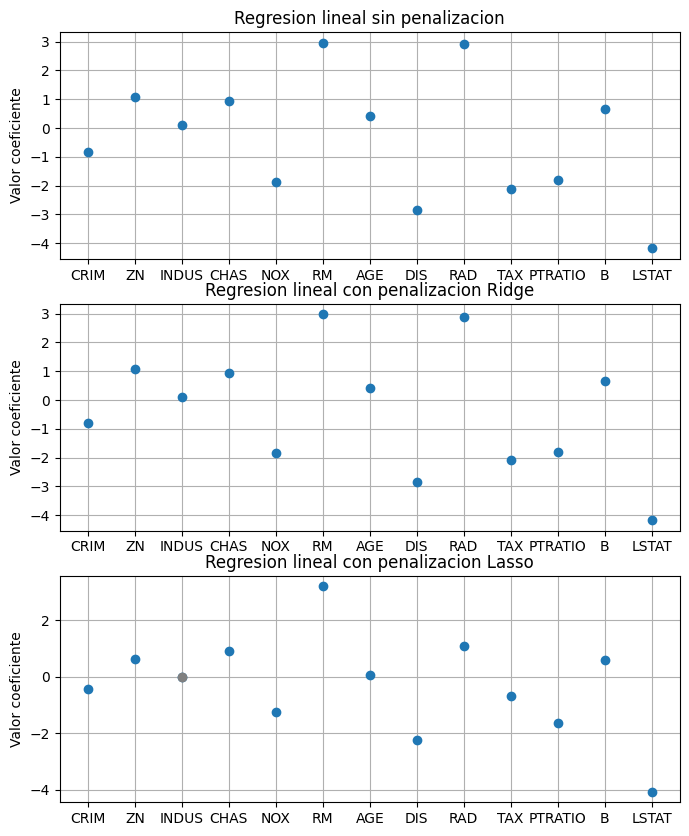

In [12]:
coefs_regresionLineal = lr.coef_ ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION SIN PENALIZACION
coefs_regresionRidge = modeloRidge.coef_ ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION CON PENALIZACION RIDGE
coefs_regresionLasso = modeloLasso.coef_ ### RELLENE PARA EXTRAER LOS COEFICIENTES DE LA REGRESION CON PENALIZACION LASSO

# Graficamos los coeficientes de la regresion sin penalizacion
plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.plot(coefs_regresionLineal.T,'o')
plt.title('Regresion lineal sin penalizacion')
plt.ylabel('Valor coeficiente')
plt.grid(True)
axis = plt.xticks(ticks=np.arange(13), labels=caracteristicas)

# Graficamos los coeficientes de la regresion con penalizacion RIDGE
plt.subplot(3,1,2)
grafico = plt.plot(coefs_regresionRidge.T,'o')
plt.title('Regresion lineal con penalizacion Ridge')
plt.ylabel('Valor coeficiente')
plt.grid(True)
axis = plt.xticks(ticks=np.arange(13), labels=caracteristicas)

# Graficamos los coeficientes de la regresion con penalizacion
plt.subplot(3,1,3)
inactivos = np.flatnonzero(coefs_regresionLasso == 0)
grafico = plt.plot(coefs_regresionLasso.T,'o')
plt.plot(inactivos,np.zeros(len(inactivos)),'o',color='gray')
plt.ylabel('Valor coeficiente')
plt.title('Regresion lineal con penalizacion Lasso')
plt.grid(True)
axis = plt.xticks(ticks=np.arange(13), labels=caracteristicas)

**Pregunta 1.5:** ¿Cómo se comparan los coeficientes de los diferentes modelos entre sí? Cuando visualizamos la matriz de correlación al principio, pensamos qué variables serían más importantes. ¿Cómo se condice su hipótesis de esa pregunta con los coeficientes de los modelos?

*Puede insertar sus respuestas aquí:*

**INTENTE COMPLETAR LA PREGUNTA DE ARRIBA ANTES DE PASAR A LA PRÓXIMA**

En el cuaderno anterior discutimos la importancia de normalizar los datos. En regresión lineal también puede ser importante, particularmente si usamos regularización, y también para interpretar los coeficientes del modelo.

**Pregunta 1.6:** Hipotetice sobre cómo pueden cambiar los resultados si no normalizamos los datos. Vuelva a correr el análisis de arriba usando datos no normalizados. ¿Cómo se comparan los resultados con los datos normalizados y no-normalizados?


*Puede insertar sus respuestas aquí:*

## Ejercicio 2 - Arboles de decision

### 2.1 - Penguins dataset

El [Penguins Dataset](https://github.com/allisonhorst/palmerpenguins) se trata de un dataset con una estructura muy similar a Iris, pero en este caso tenemos 5 caracteristicas para tres especies distintas de pinguinos. Los datos son el sexo del pinguino, largo y ancho del pico ("bill" en ingles), largo de la aleta, y peso.

A diferencia de el problema anterior, en el que queríamos predecir una cantidad continua, en este problema queremos predecir una clase. Por eso usamos un modelo de *clasificación* para este problema.

In [14]:
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins = pandas.DataFrame(penguins)

Los datasets suelen tener caracteristicas no relevadas y estas pueden ser muy problematicas al momento de pasar los datos al modelo para entrenar.

Podemos ver si hay datos faltantes para alguna caracteristica usando la funcion *.isnull()* de pandas, y podemos obtener un DataFrame sin los datos faltantes con la funcion *.dropna()*.

In [15]:
print("Cantidad de datos faltantes por categoria:\n", penguins.isnull().sum())
print("----------------------------")

penguins = penguins.dropna() # esta línea es para borrar observaciones que les faltan datos

print("Cantidad de datos faltantes por categoria luego de usar dropna:\n",
      penguins.isnull().sum())

Cantidad de datos faltantes por categoria:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
----------------------------
Cantidad de datos faltantes por categoria luego de usar dropna:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


**Nota auxiliar: Características categóricas**

Vemos que el dataset *penguins* tiene un tipo de característica nueva que no hemos visto hasta ahora: las características *island* y *sex* son variables categóricas. La variable *island*, por ejemplo, puede tomar 3 valores distintos, Biscoe, Torgersen, Dream, que no necesariamente siguen un orden claro (ej. no es un valor mayor o menor que el otro).

Para incluir una variable categórica en el modelo, en general debemos re-codificarla. Una forma de recodificarla es convertir las clases en números (ej. convertir los valores de *island* en 1, 2, 3), pero esto le da un orden aritificial a los datos. Otra muy utilizada es convertirlas en "Dummy variables", una cantidad N de columnas nuevas igual a la cantidad de N valores que puede tomar la variable, con un 1 indicando a dónde pertencece la variable.'

Por simplicidad, convertimos la variable *island* en una variable numérica.

Abajo convertimos las variables categóricas en variables numéricas, y separamos los datos en set de entrenamiento y de testeo.

In [16]:
# Convertimos island y sex en variables numéricas. En sex, macho=0, hembra=1.
penguins['island'], nombresIslas = pandas.factorize(penguins['island'])
penguins['sex'] = (penguins['sex'] == "Female").astype(int)
#
# como en el cuaderno 1-3, extraemos los datos y etiquetas
#
etiquetas = penguins['species'] # extraemos la columna 'species' para hacer la clasificacion
y, m = pandas.factorize(etiquetas)
X = penguins.drop(['species'], axis=1) # borramos la columna 'species' de la tabla, para obtener el X
## y separamos los datos en un set de entrenamiento y otro de testeo
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

Como siempre, antes del análisis visualizamos nuestros datos

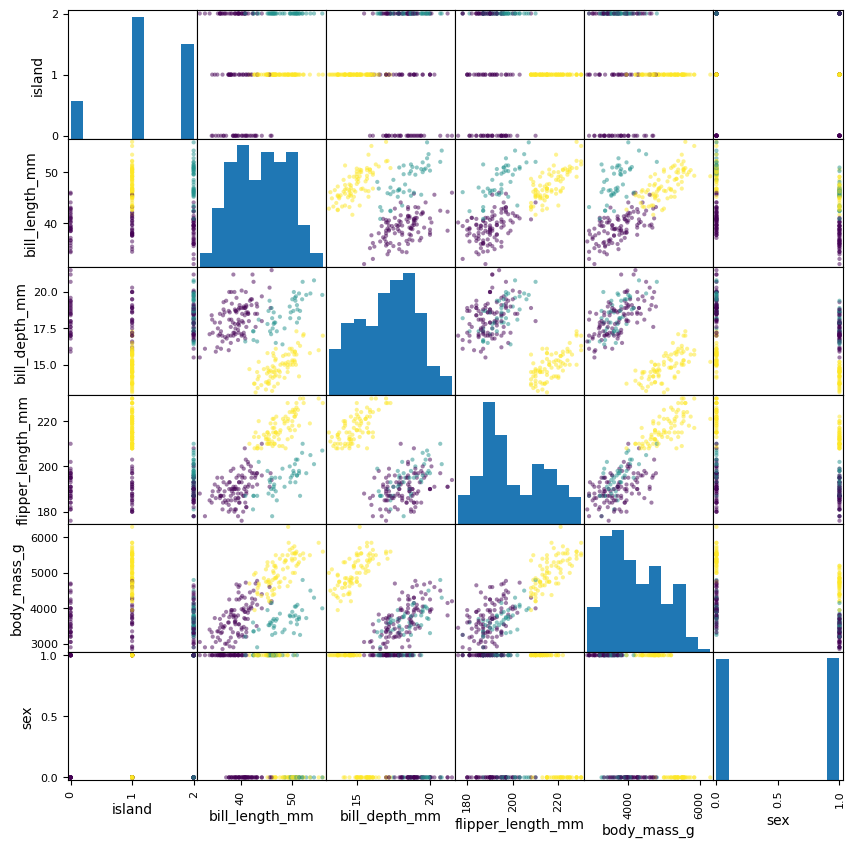

In [17]:
#
# graficamos un scatter plot de los datos
grr = pandas_plot.scatter_matrix(Xtrain, c=ytrain, figsize=(10,10))
#

Para clasificar la especie de los pinguinos, entrenaremos un árbol de decisión sobre los datos de entrenamiento.



In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

arbolDecision = DecisionTreeClassifier()
arbolDecision.fit(Xtrain, ytrain)

DecisionTreeClassifier()

Ahora quisiéramos ver el rendimiento de modelo en clasificar las especies de pinguinos, tanto en el training set como en el testing set. Escriba abajo el código necesario para ver el rendimiento del modelo *arbolDecision* en el set de entrenamiento y en el set de testeo.

**Sugerencia:** La evaluación del rendimiento se puede hacer a mano con la función *.predict*, extrayendo las predicciones para Xtrain, comparando con ytrain y promediando las respuestas (como en el ejemplo del KNN del taller 1). Otra posibilidad es usar la función  *arbolDecision.score*, que hace todos los pasos automáticamente y devuelve la proporción de predicciones correctas. Los parámetros que le tenemos que dar a *.score* son las X que queremos usar, y las *y* correctas para esas X.

In [19]:
# Escriba su código aquí

**Regularización en árboles de decisión:** Al igual que los otros métodos que ya vimos, los árboles de decisión también pueden sobreajustarse a los datos. Esto ocurre si permitimos que el modelo haga "muchas preguntas", hasta llegar a clasificar correctamente a cada dato de entrenamiento. Hay varios métodos para evitar que los árboles de decisión se sobreajusten. Uno es fijar la profundidad máxima que puede tener el árbol (cuantas "preguntas" hace el modelo).

En el objeto *DecisionTreeClassifier* que vimos en el cuaderno práctico 2-2, tiene el parámetro *max_depth* que podemos elegir, que marca la máxima profunidad del árbol. Pruebe entrenar y testear un nuevo árbol de decisión abajo, variando el *max_depth*.

**Extra 2.1:** Haga lo propuesto arriba, pero usando un loop *for* para iterar entre los valores de *max_depth*

In [ ]:
# Escriba su código aquí

### 2.2 - Interpretabilidad

Hay muchas maneras de intentar interpretar los algoritmos de clasificacion. Herramientas graficas que nos permitan ver como se separan los datos en una cierta representacion especial pueden ser muy intuitivas en algunos casos. Tambien por lo general es posible calcular coeficientes que expresen la importancia de las caracteristicas de los datos para el modelo.

Una herramienta para la interpretacion del arbol de decision podria ser ver graficamente las fronteras que establecio el algoritmo entre los datos. Esto tiene sentido analizarlo particularmente para para cuando se aplica el algoritmo sobre una entrada de dos caracteristicas, ya que la representacion tiene una caracteristica por eje y por lo tanto podemos hacerlo solo hasta 3 caracteristicas (3 dimensiones).

Utilizamos la funcion *pintar_regiones* del notebook 2.2 para ver como actua el algoritmo entrenado sobre **pares** de caracteristicas.

Elegir un par de caracteristicas que den un buen rendimiento (fundamentar), imprimir la grafica con las regiones de clasificacion pintadas, e interpretar donde esta tomando las fronteras para las ramas, el arbol de decision.

In [20]:
caracteristicas = penguins.drop(['species'], axis=1).keys()
# Seleccione los pares de variables que quiera usar para ajustar el modelo
# Recuerde que las variables posibles son:
# 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'
#
variablesUsadas = ['bill_length_mm', 'bill_depth_mm'] # MODIFICABLE

# Extraemos los índices de las columnas que corresponden a esos nombres, usando list comprehensions
indicesUsados = [i for i, val in enumerate(caracteristicas) if val in variablesUsadas]

# Con los índices, armamos Xtrain y Xtest incompletos, con sólo las columnas especificadas
Xtrain_inc = np.array(Xtrain)[:,indicesUsados]
Xtest_inc = np.array(Xtest)[:,indicesUsados]

arbolDecision = DecisionTreeClassifier()
arbolDecision.fit(Xtrain_inc, ytrain)

DecisionTreeClassifier()

In [21]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
newcolors = [(*c[:3],0.3) for c in cm.RdYlBu(np.linspace(0, 1, 256))]
transp = ListedColormap(newcolors)

def pintar_regiones(X,y,clasificador,res=100):
  '''
  pintamos la región de decisión
  barremos todo el espacio con una grilla fina y pintamos cada punto
  con la clase asignada.
  '''
  x1s = np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
  x2s = np.linspace(np.min(X[:,1]),np.max(X[:,1]),100)
  ns = len(x1s)*len(x2s)
  X_aux = np.zeros((ns,2))
  i = 0
  for x1 in x1s:
    for x2 in x2s:
      X_aux[i,0] = x1
      X_aux[i,1] = x2
      i += 1
  y_aux = clasificador.predict(X_aux)
  #
  # grilla fina:
  #
  plt.scatter(X_aux[:,0],X_aux[:,1],marker='o',edgecolors='none',c=y_aux,s=10,cmap=transp)
  #
  # puntos de referencia
  #
  plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=50,cmap=cm.RdYlBu)
  plt.title('Región de decisión')
  plt.xlabel('Dato 1')
  plt.ylabel('Dato 2')
  plt.show()

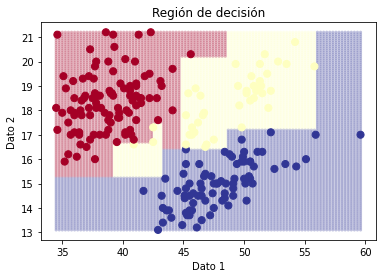

In [ ]:
#
# ejecutamos función
#
pintar_regiones(Xtrain_inc,ytrain,arbolDecision)

En el notebook 2.2 de la clase pasada, vimos codigo que permite dibujar el grafo del arbol de decision usando el paquete _dtreeviz_.

Comprobar que el analisis de las regiones de clasificacion anteriormente hecho tenia sentido imprimiendo el grafo.

Luego ver como cambia el grafo al hacerlo para el modelo entrenado con **todas** las caracteristicas.

In [ ]:
# visualización con dtreeviz

En funcion de lo observado en las regiones con distintos pares de caracteristicas, y de lo que se ve en el ultimo grafo, que caracteristicas tendran mas importancia? Graficar los *.feature_importances_* del modelo (como fue hecho en el notebook 2.3 de la clase pasada) para ver si estabamos en lo cierto segun la medida de importancia de sklearn.

In [ ]:
# la importancia de cada variable en el arbol de decision

In [ ]:
##
## DESCOMENTAR PARA GUARDAR PDF!
##
#%%capture
#!apt-get install --quiet texlive-xetex inkscape pandoc texlive-fonts-recommended texlive-generic-recommended
#!pip install --quiet nbconvert
#!jupyter nbconvert --to pdf /content/drive/MyDrive/Cursos/AABC/Clases/aabc-practico4-1-representacion.ipynb